## Text Localization Detector

### Import packages 

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

### Text detector

In [2]:
def detect_text(img):
    #Create MSER object
    mser = cv2.MSER_create()

    #Converting image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    vis = img.copy()

    #detect regions in gray scale image
    regions, _ = mser.detectRegions(gray)

    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
    cv2.polylines(vis, hulls, 1, (0, 255, 0))

    mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

    for contour in hulls:
        cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

    #this is used to find only text regions, remaining are ignored
    text_only = cv2.bitwise_and(img, img, mask=mask)
    
    return vis, text_only

### Running on multiple images and seeing the result

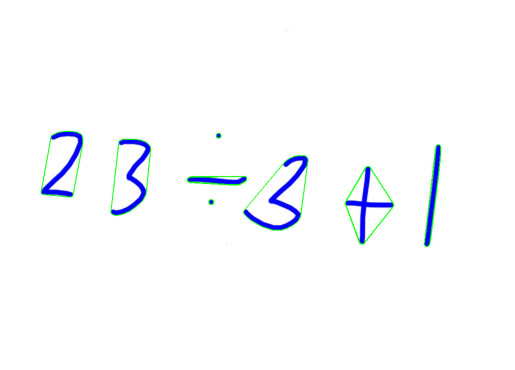

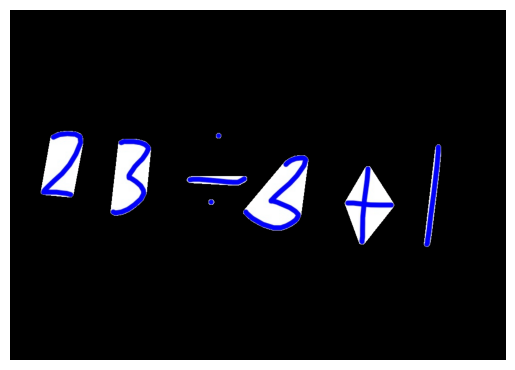

In [25]:
img = cv2.imread('images_to_try/img_65.jpg')
out1, out2 = detect_text(img)
plt.imshow(out1)
plt.axis('off')
plt.show()

plt.imshow(out2)
plt.axis('off')
plt.show()

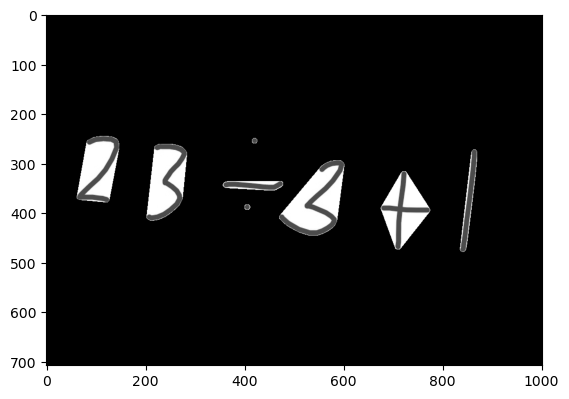

In [26]:
new_img = cv2.cvtColor(out2, cv2.COLOR_BGR2GRAY)
plt.imshow(new_img, cmap='gray')

In [36]:
non_zero_cols = []
for val in range(1,new_img.shape[1]-1):
    if sum(new_img[:,val])!=0 and sum(new_img[:,val-1])==0:
        non_zero_cols.append(val-10)
        
    elif sum(new_img[:,val])==0 and sum(new_img[:,val-1])!=0:
        non_zero_cols.append(val+10)

In [37]:
non_zero_cols

[52, 158, 193, 295, 347, 613, 666, 787, 826, 881]

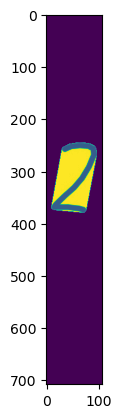

In [38]:
plt.imshow(new_img[:,52:158])

[21, 105, 114, 203, 207, 325, 356, 446, 451, 537, 597, 664, 703, 797, 809, 987]

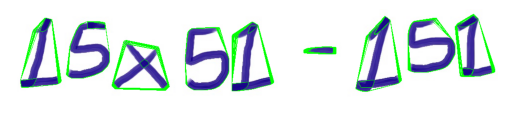

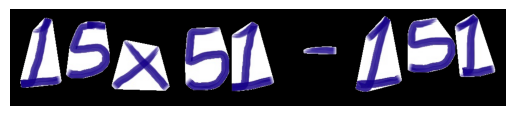

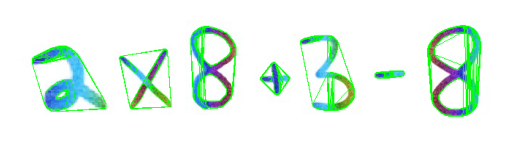

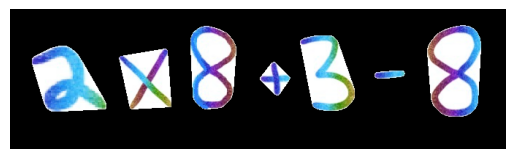

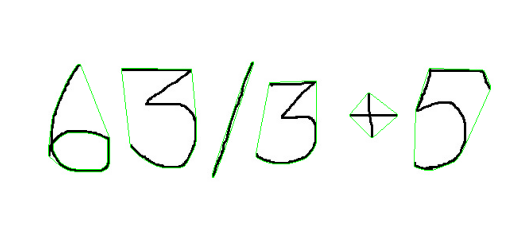

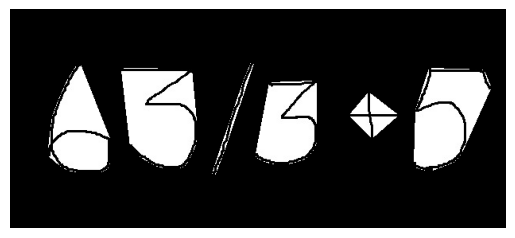

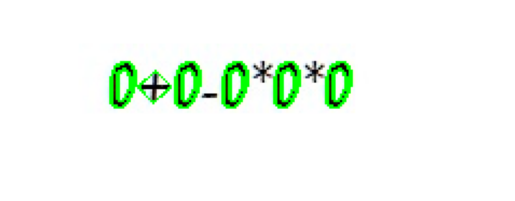

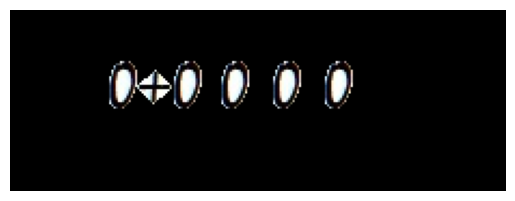

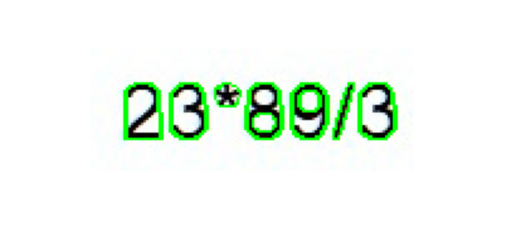

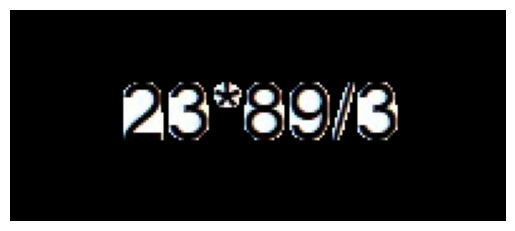

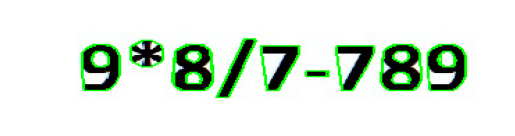

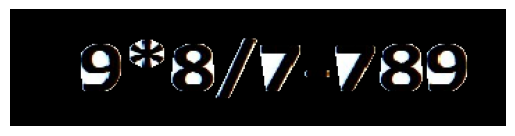

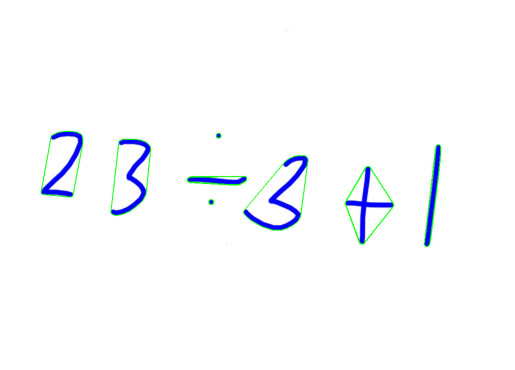

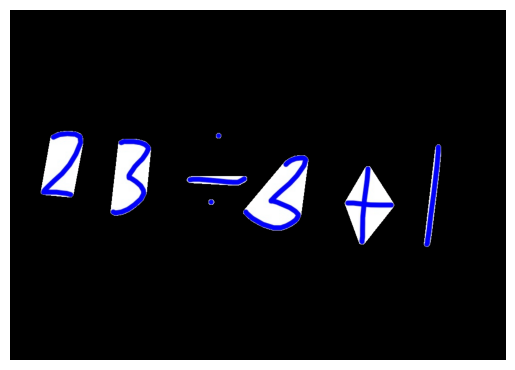

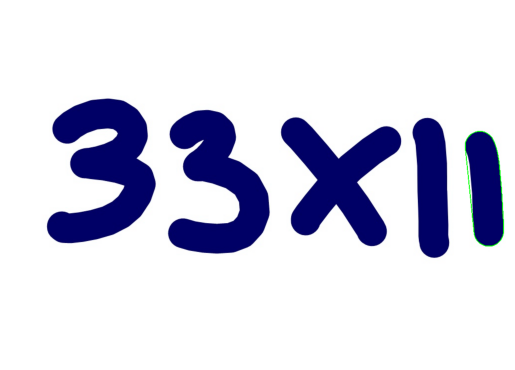

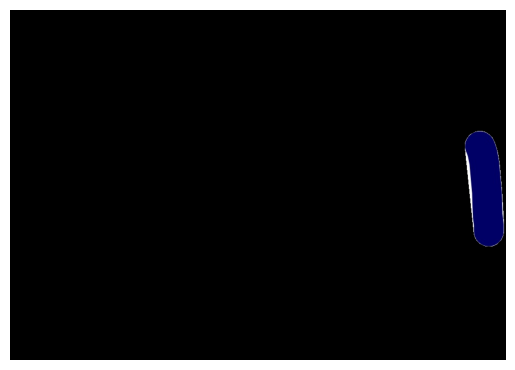

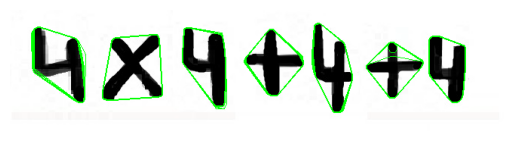

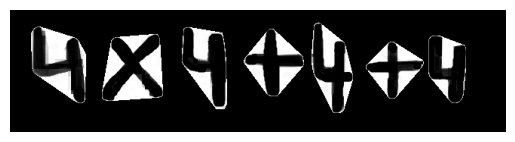

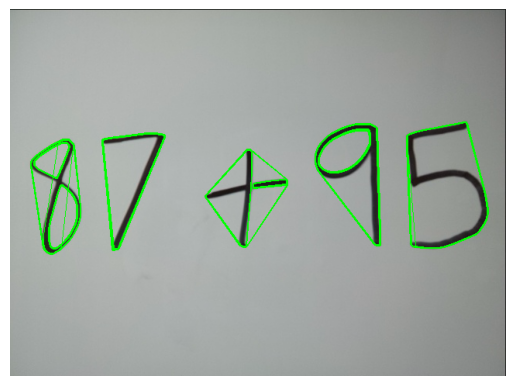

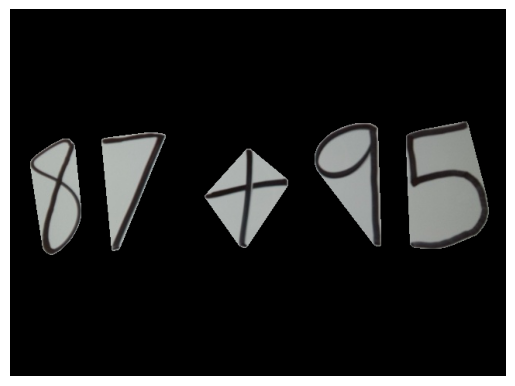

In [19]:
import os

image_path = 'images_to_try'
for im in os.listdir(image_path):
    img = cv2.imread(os.path.join(image_path, im))

    out1, out2 = detect_text(img)
    plt.imshow(out1)
    plt.axis('off')
    plt.show()

    plt.imshow(out2)
    plt.axis('off')
    plt.show()

In [36]:
import pandas as pd

In [44]:
gt = pd.read_csv('all_images_ground_truth.csv')

In [46]:
gt

,ID,Answer
0,img_1.jpg,4-16/4*5
1,img_2.jpg,5+34/6-4*23+2
2,img_3.jpg,3*0+75*8
3,img_4.jpg,2+41/7
4,img_5.jpg,-82+9*29
...,...,...
155,img_156.jpg,28-12*4
156,img_157.jpg,9*12+6
157,img_158.jpg,17-12*2
158,img_159.jpg,87+15-47
